# GROUP PROJECT_Part 1 Dataset Pre-processing

In [ ]:
!pip install langid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import necessary packages

In [ ]:
import numpy as np 
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import langid
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet


import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the CSV file into a pandas DataFrame
#dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/fake_job_postings.csv")
dataset = pd.read_csv("fake_job_postings.csv")

dataset

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


## Feature selection

In [ ]:
dataset.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [ ]:
drop_columns = ['job_id', 'title', 'location', 'department', 'industry', 'function']

dataset = dataset.drop(drop_columns, axis=1)

dataset

,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,0
1,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,0
2,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,0
3,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,0
17876,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
17877,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,0
17878,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,0


In [ ]:
dataset.isnull().sum()

salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
fraudulent                 0
dtype: int64

In [ ]:
category_columns = ['employment_type', 'required_experience', 'required_education']

for col in category_columns:
    dataset[col].fillna("Unknown", inplace=True)

dataset

,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,Unknown,0
1,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,0
2,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,Unknown,Unknown,Unknown,0
3,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,Unknown,0
17876,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
17877,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,Unknown,Unknown,0
17878,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,0


In [ ]:
text_columns = ['company_profile', 'description', 'requirements', 'benefits']

dataset = dataset.dropna(subset=text_columns, how='all')

for col in text_columns:
    dataset[col].fillna(' ', inplace=True)

dataset

,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,Unknown,0
1,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,0
2,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,Unknown,Unknown,Unknown,0
3,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,Unknown,0
17876,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
17877,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,Unknown,Unknown,0
17878,NaN,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,0


In [ ]:
unique_salary = dataset['salary_range'].unique()
print(unique_salary[0:5])

[nan '20000-28000' '100000-120000' '120000-150000' '50000-65000']


In [ ]:
new = dataset['salary_range'].str.split("-", n = 1, expand = True) 

dataset['salary_range_min']= new[0]
dataset['salary_range_max']= new[1]

dataset['salary_range_min'].fillna('-1', inplace=True)
dataset['salary_range_max'].fillna('-1', inplace=True)

def remove_string(x):
    if not x.isnumeric(): 
        val = '-1'
    else:
        val = x
    return val

dataset['salary_range_min'] = dataset['salary_range_min'].apply(lambda x: remove_string(x))
dataset['salary_range_max'] = dataset['salary_range_max'].apply(lambda x: remove_string(x))

dataset.drop('salary_range', axis=1, inplace = True)

dataset

,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,salary_range_min,salary_range_max
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,Unknown,0,-1,-1
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,0,-1,-1
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,Unknown,Unknown,Unknown,0,-1,-1
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0,-1,-1
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,Unknown,0,-1,-1
17876,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,-1,-1
17877,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,Unknown,Unknown,0,-1,-1
17878,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,0,-1,-1


## Exploratory Data Analysis

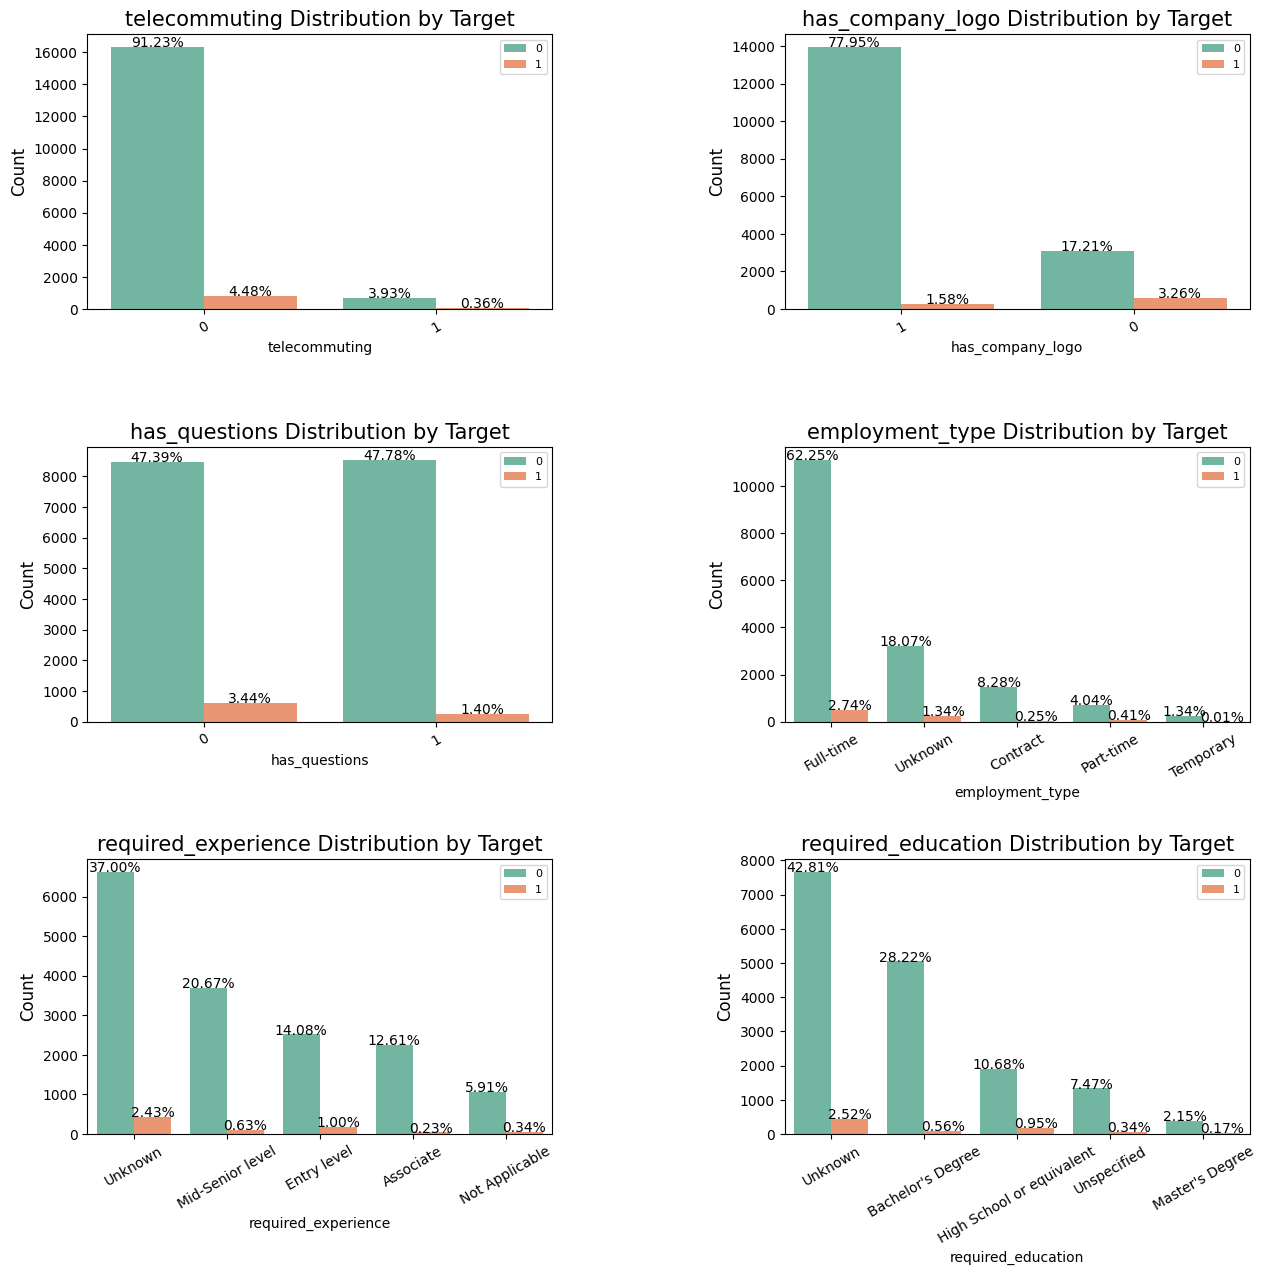

In [ ]:
category_eda_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education']


grid = gridspec.GridSpec(5, 2, wspace=0.5, hspace=0.5) 
plt.figure(figsize=(15,25)) 

for n, col in enumerate(dataset[category_eda_columns]): 
    ax = plt.subplot(grid[n]) 
    sns.countplot(x=col, data=dataset, hue='fraudulent', palette='Set2', order=dataset[col].value_counts().iloc[:5].index) 
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'{col} Distribution by Target', fontsize=15) 
    xlabels = ax.get_xticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=30) 
    total = len(dataset)
    sizes=[] 
    for p in ax.patches: 
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    
plt.show()

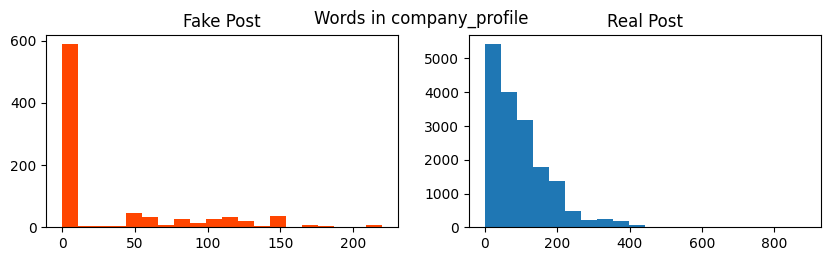

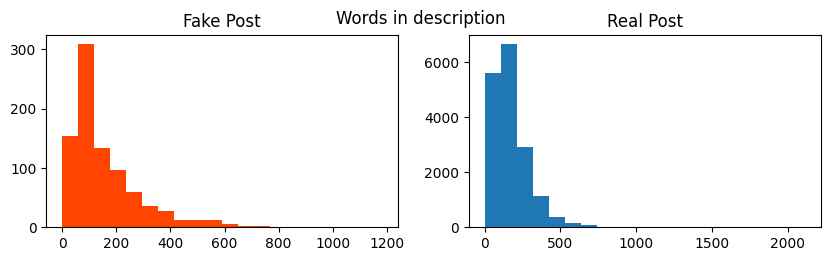

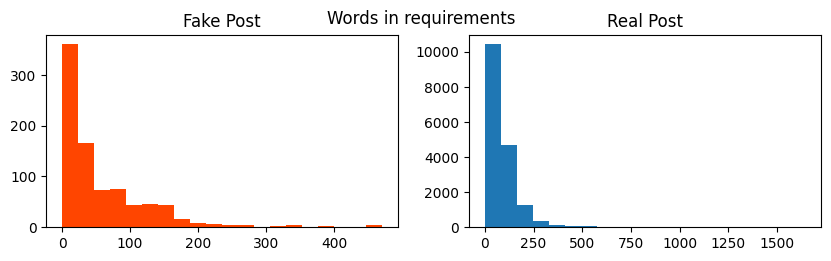

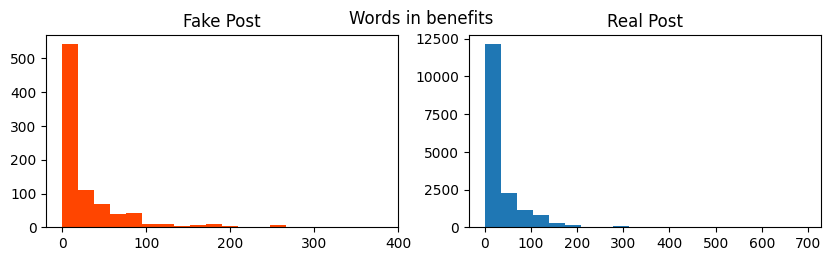

In [ ]:
text_cols = ['company_profile', 'description', 'requirements', 'benefits']

for col in text_cols:
    fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(10, 2.5), dpi=100)
    num=dataset[dataset["fraudulent"]==1][col].str.split().map(lambda x: len(x))
    ax1.hist(num,bins = 20,color='orangered')
    ax1.set_title('Fake Post')
    num=dataset[dataset["fraudulent"]==0][col].str.split().map(lambda x: len(x))
    ax2.hist(num, bins = 20)
    ax2.set_title('Real Post')
    fig.suptitle(f'Words in {col}')
    plt.show()

## Text_cols pre-processing

In [ ]:
text_cols = ['company_profile', 'description', 'requirements', 'benefits']

dataset['merge_comp_col'] = dataset[text_cols].apply(lambda x: ' '.join(x), axis=1)
dataset.drop(text_cols, axis=1, inplace=True)


print(dataset.loc[0, 'merge_comp_col'])

We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, 

In [ ]:
def detect_lang(x):
    code,_ = langid.classify(x)
    
    return code

dataset = dataset[dataset['merge_comp_col'].apply(lambda x: detect_lang(x) == 'en')]

dataset

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,salary_range_min,salary_range_max,merge_comp_col
0,0,1,0,Other,Internship,Unknown,0,-1,-1,"We're Food52, and we've created a groundbreaki..."
1,0,1,0,Full-time,Not Applicable,Unknown,0,-1,-1,"90 Seconds, the worlds Cloud Video Production ..."
2,0,1,0,Unknown,Unknown,Unknown,0,-1,-1,Valor Services provides Workforce Solutions th...
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0,-1,-1,Our passion for improving quality of life thro...
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,-1,-1,SpotSource Solutions LLC is a Global Human Cap...
...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,Full-time,Mid-Senior level,Unknown,0,-1,-1,Vend is looking for some awesome new talent to...
17876,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,-1,-1,WebLinc is the e-commerce platform and service...
17877,0,0,0,Full-time,Unknown,Unknown,0,-1,-1,We Provide Full Time Permanent Positions for m...
17878,0,0,1,Contract,Not Applicable,Professional,0,-1,-1,Nemsia Studios is looking for an experienced...


In [ ]:
def clean_text(text):
    text = text.lower()                                              # make the text lowercase
    text = re.sub('\[.*?\]', '', text)                               # remove text in brackets
    text = re.sub('http?://\S+|www\.\S+', '', text)                  # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)                 # remove links
    text = re.sub('<.*?>+', '', text)                                # remove HTML stuff
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # get rid of punctuation
    text = re.sub('\n', '', text)                                    # remove line breaks
    #text = re.sub('\w*\d\w*', '', text)                             # remove anything with numbers, if you want
    #text = re.sub(r'[^\x00-\x7F]+',' ', text)                       # remove unicode
    return text

dataset['merge_comp_col'] = dataset['merge_comp_col'].apply(lambda x: clean_text(x))

dataset

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,salary_range_min,salary_range_max,merge_comp_col
0,0,1,0,Other,Internship,Unknown,0,-1,-1,were food52 and weve created a groundbreaking ...
1,0,1,0,Full-time,Not Applicable,Unknown,0,-1,-1,90 seconds the worlds cloud video production s...
2,0,1,0,Unknown,Unknown,Unknown,0,-1,-1,valor services provides workforce solutions th...
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0,-1,-1,our passion for improving quality of life thro...
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,-1,-1,spotsource solutions llc is a global human cap...
...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,Full-time,Mid-Senior level,Unknown,0,-1,-1,vend is looking for some awesome new talent to...
17876,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,-1,-1,weblinc is the ecommerce platform and services...
17877,0,0,0,Full-time,Unknown,Unknown,0,-1,-1,we provide full time permanent positions for m...
17878,0,0,1,Contract,Not Applicable,Professional,0,-1,-1,nemsia studios is looking for an experienced...


In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def remove_stopwords(text):
    words = [w for w in text if w not in stop_words]
    return words

def lemmatization(tokens):
    lemmatized_words = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_words

def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

dataset['merge_comp_col'] = dataset['merge_comp_col'].apply(lambda x: tokenizer.tokenize(x))
dataset['merge_comp_col'] = dataset['merge_comp_col'].apply(lambda x : remove_stopwords(x))
dataset['merge_comp_col'] = dataset['merge_comp_col'].apply(lambda x: lemmatization(x))
dataset['merge_comp_col'] = dataset['merge_comp_col'].apply(lambda x : combine_text(x))

dataset

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,salary_range_min,salary_range_max,merge_comp_col
0,0,1,0,Other,Internship,Unknown,0,-1,-1,food52 weve created groundbreaking awardwinnin...
1,0,1,0,Full-time,Not Applicable,Unknown,0,-1,-1,90 second world cloud video production service...
2,0,1,0,Unknown,Unknown,Unknown,0,-1,-1,valor service provides workforce solution meet...
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0,-1,-1,passion improving quality life geography heart...
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,-1,-1,spotsource solution llc global human capital m...
...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,Full-time,Mid-Senior level,Unknown,0,-1,-1,vend looking awesome new talent come join u yo...
17876,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,-1,-1,weblinc ecommerce platform service provider fa...
17877,0,0,0,Full-time,Unknown,Unknown,0,-1,-1,provide full time permanent position many medi...
17878,0,0,1,Contract,Not Applicable,Professional,0,-1,-1,nemsia studio looking experienced visualgraphi...


In [ ]:
df = pd.DataFrame()
df['text'] = dataset['merge_comp_col']
df['fraudulent'] = dataset['fraudulent']
df['word count'] = [len(i.split(' ')) for i in df['text']]
df

,text,fraudulent,word count
0,food52 weve created groundbreaking awardwinnin...,0,240
1,90 second world cloud video production service...,0,536
2,valor service provides workforce solution meet...,0,212
3,passion improving quality life geography heart...,0,476
4,spotsource solution llc global human capital m...,0,338
...,...,...,...
17875,vend looking awesome new talent come join u yo...,0,489
17876,weblinc ecommerce platform service provider fa...,0,426
17877,provide full time permanent position many medi...,0,234
17878,nemsia studio looking experienced visualgraphi...,0,118


In [ ]:
sent_length = df['word count'].max()

#  GROUP PROJECT_Part 2 LSTM Model

In [ ]:
from string import punctuation

texts = [''.join([t for t in text]) for text in df['text']]

# split by new lines and spaces
all_text = ' '.join(texts)

# create a list of words
words = all_text.split()
words

['food52',
 'weve',
 'created',
 'groundbreaking',
 'awardwinning',
 'cooking',
 'site',
 'support',
 'connect',
 'celebrate',
 'home',
 'cook',
 'give',
 'everything',
 'need',
 'one',
 'placewe',
 'top',
 'editorial',
 'business',
 'engineering',
 'team',
 'focused',
 'using',
 'technology',
 'find',
 'new',
 'better',
 'way',
 'connect',
 'people',
 'around',
 'specific',
 'food',
 'interest',
 'offer',
 'superb',
 'highly',
 'curated',
 'information',
 'food',
 'cooking',
 'attract',
 'talented',
 'home',
 'cook',
 'contributor',
 'country',
 'also',
 'publish',
 'wellknown',
 'professional',
 'like',
 'mario',
 'batali',
 'gwyneth',
 'paltrow',
 'danny',
 'meyer',
 'partnership',
 'whole',
 'food',
 'market',
 'random',
 'housefood52',
 'named',
 'best',
 'food',
 'website',
 'james',
 'beard',
 'foundation',
 'iacp',
 'featured',
 'new',
 'york',
 'time',
 'npr',
 'pando',
 'daily',
 'techcrunch',
 'today',
 'showwere',
 'located',
 'chelsea',
 'new',
 'york',
 'city',
 'food52',

## Encoding

In [ ]:
from collections import Counter

# Build a dictionary that maps words to integers
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

# use the dict to tokenize each article in text split
# store the tokenized texts in text_ints
text_ints = []
for text in texts:
    text_ints.append([vocab_to_int[word] for word in text.split()])

# get the labels (0 and 1) from the data set
encoded_labels = [label for label in df['fraudulent']]

In [ ]:
# stats about vocabulary
print('Unique words: ', len((vocab_to_int)))

# print tokens in first article
print('Tokenized text: \n', text_ints[:1])

Unique words:  152301
Tokenized text: 
 [[3140, 1245, 777, 2944, 1686, 2392, 193, 36, 1156, 3660, 127, 2553, 433, 666, 40, 49, 6473, 228, 1741, 7, 100, 2, 445, 90, 19, 390, 10, 383, 109, 1156, 22, 162, 427, 377, 479, 65, 2982, 132, 3243, 85, 377, 2392, 2143, 238, 127, 2553, 2592, 348, 56, 2593, 4043, 44, 74, 6474, 6574, 6384, 6385, 6386, 6575, 501, 1263, 377, 97, 4390, 6729, 1973, 53, 377, 116, 4337, 5324, 993, 6576, 3230, 10, 525, 28, 6387, 6577, 231, 4299, 415, 6730, 347, 5363, 10, 525, 380, 3140, 827, 4337, 5324, 1686, 89, 377, 161, 14179, 3243, 4626, 2645, 266, 2197, 87, 1294, 5813, 1094, 1, 181, 2, 2038, 336, 146, 10, 525, 380, 42538, 158, 27710, 245, 3140, 149, 318, 140, 193, 15882, 1056, 3141, 12335, 234, 149, 13, 33196, 996, 116, 2536, 3140, 2031, 33197, 1057, 2031, 98, 36, 1233, 2031, 1033, 2031, 33198, 1246, 15, 202, 33199, 42, 623, 1, 1373, 1852, 1221, 33200, 146, 209, 1927, 3822, 424, 24155, 29, 336, 159, 3, 149, 13, 43, 543, 215, 5006, 24156, 3140, 1741, 1359, 27711, 377, 

In [ ]:
# outlier article stats
text_lens = Counter([len(x) for x in text_ints])
print("Zero-length text: {}".format(text_lens[0]))
print("Maximum text length: {}".format(max(text_lens)))

Zero-length text: 0
Maximum text length: 1422


In [ ]:
print('Number of texts before removing outliers: ', len(text_ints))

## remove any articles/labels with zero length from the text_ints list.

# get indices of any articles with length 0
non_zero_idx = [ii for ii, text in enumerate(text_ints) if len(text) != 0]

# remove 0-length articles and their labels
text_ints = [text_ints[ii] for ii in non_zero_idx]
encoded_labels = np.array([encoded_labels[ii] for ii in non_zero_idx])

print('Number of texts after removing outliers: ', len(text_ints))

Number of texts before removing outliers:  17692
Number of texts after removing outliers:  17692


## Padding sequences

In [ ]:
def pad_features(text_ints, seq_length):
    ''' Return features of text_ints, where each article is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(text_ints), seq_length), dtype=int)

    # for each article, grab that article and 
    for i, row in enumerate(text_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [ ]:
seq_length = 200

features = pad_features(text_ints, seq_length=seq_length)

# test statements - do not change -
assert len(features)==len(text_ints), "Your features should have as many rows as articles."
assert len(features[0])==seq_length, "Each feature row should contain seq_length values."

# print first 10 values of the first 30 batches 
print(features[:30, :10])

[[ 3140  1245   777  2944  1686  2392   193    36  1156  3660]
 [  808  1061    55   607   334   165  8585  1061    55   607]
 [ 1069     5   332  1261    23   166    40     4   101   559]
 [  233  1040    52   106  3018   699   666  1750  2594    85]
 [ 2767    23  1268   119   409   551    13   311   271  1604]
 [   20  9746   934   311   271    65  2449   290    94  1113]
 [  473  2048 16930  4010 12337   186    46  2259 11007    55]
 [ 4957   254    45  3596  1302  3299   272    87     5   985]
 [    0     0     0     0     0     0     0     0     0     0]
 [ 1028   296    23  1129  1243  1236    13     5   669   167]
 [   30 10395  6142   287   676 19686 21534 27721     1   419]
 [   76    88  2716  2663   154  3496  3426    40   325   154]
 [ 1028   296    23  1129  1243  1236    13     5   669   167]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0  5499   489   137   118]
 [16936   532   137  1646    60   771   775   532   551

## Training, Validation, and Test

In [ ]:
# split data into training, validation, and test data (features and labels, x and y)
split_idx = 16000 
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = (len(features)-16000)//2
val_x, test_x = remaining_x[:test_idx-2], remaining_x[test_idx-2:-4]
val_y, test_y = remaining_y[:test_idx-2], remaining_y[test_idx-2:-4]

# print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(16000, 200) 
Validation set: 	(844, 200) 
Test set: 		(844, 200)


## DataLoaders and Batching

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 10

# make sure the SHUFFLE your training data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, num_workers=5, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=False, batch_size=batch_size, num_workers=5, drop_last=True)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size, num_workers=5, drop_last=True)

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size())  # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size())  # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([10, 200])
Sample input: 
 tensor([[    0,     0,     0,  ...,    69,   610,   671],
        [ 1362,   489,    60,  ..., 30710,    31,   626],
        [19612,   140,   332,  ...,   242,   139,    63],
        ...,
        [19442,  2498,   332,  ...,     7,  6000,   434],
        [    0,     0,     0,  ...,  5168, 22026,    42],
        [ 1012,  4781,   137,  ...,   319,   136,    37]])

Sample label size:  torch.Size([10])
Sample label: 
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## LSTM model with PyTorch

In [ ]:

# First checking if GPU is available
train_on_gpu = torch.cuda.is_available()

if train_on_gpu:
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [ ]:
import torch.nn as nn


class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,
                            dropout=drop_prob, batch_first=True)

        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()


    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)

        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1]  # get last batch of labels

        # return last sigmoid output and hidden state
        return sig_out, hidden


    def init_hidden(self, batch_size):
        """ Initializes hidden state """
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data

        if train_on_gpu:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

        return hidden

## Instantiate the network

In [ ]:
vocab_size = len(vocab_to_int) + 1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 200
hidden_dim = 256
n_layers = 3

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
# move model to GPU, if available
if train_on_gpu:
    net.cuda()
    
print(net)

SentimentRNN(
  (embedding): Embedding(152302, 200)
  (lstm): LSTM(200, 256, num_layers=3, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


## Training and validating

In [ ]:
# loss and optimization functions
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=1, verbose=True)

In [ ]:
# training params
epochs = 20
counter = 0
print_every = 100
clip = 5  # gradient clipping
min_loss = np.inf

# train for some number of epochs
for e in range(epochs):
    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    num_correct = 0
    
    # initialize hidden state
    h = net.init_hidden(batch_size)

    net.train()
    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if train_on_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*inputs.size(0)

        # loss stats
        #if counter % print_every == 0:

    # Get validation loss
    val_h = net.init_hidden(batch_size)
    net.eval()
    for inputs, labels in valid_loader:

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        val_h = tuple([each.data for each in val_h])

        if train_on_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()

        output, val_h = net(inputs, val_h)
        loss = criterion(output.squeeze(), labels.float())

        # convert output probabilities to predicted class (0 or 1)
        pred = torch.round(output.squeeze())  # rounds to the nearest integer
        # compare predictions to true label
        correct_tensor = pred.eq(labels.float().view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        num_correct += np.sum(correct)
        # update average validation loss 
        valid_loss += loss.item()*inputs.size(0)

    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    scheduler.step(valid_loss)

    print("Epoch: {}/{}...".format(e + 1, epochs),
          "Step: {}...".format(counter),
          "Loss: {:.6f}...".format(train_loss),
          "Val Loss: {:.6f}".format(valid_loss),
          "Accuracy: {:.6f}".format(num_correct/len(valid_loader.dataset)))
    if min_loss >= valid_loss:
        torch.save(net.state_dict(), 'checkpointx.pth')
        min_loss = valid_loss
        print("Loss decreased. Saving model...")

Epoch: 1/20... Step: 1600... Loss: 0.137338... Val Loss: 0.053000 Accuracy: 0.986967
Loss decreased. Saving model...
Epoch: 2/20... Step: 3200... Loss: 0.098737... Val Loss: 0.053668 Accuracy: 0.983412
Epoch: 3/20... Step: 4800... Loss: 0.056343... Val Loss: 0.046781 Accuracy: 0.985782
Loss decreased. Saving model...
Epoch: 4/20... Step: 6400... Loss: 0.030847... Val Loss: 0.065860 Accuracy: 0.981043
Epoch 00005: reducing learning rate of group 0 to 1.0000e-04.
Epoch: 5/20... Step: 8000... Loss: 0.016663... Val Loss: 0.062735 Accuracy: 0.986967
Epoch: 6/20... Step: 9600... Loss: 0.010069... Val Loss: 0.068158 Accuracy: 0.982227
Epoch 00007: reducing learning rate of group 0 to 1.0000e-05.
Epoch: 7/20... Step: 11200... Loss: 0.004241... Val Loss: 0.078172 Accuracy: 0.979858
Epoch: 8/20... Step: 12800... Loss: 0.002865... Val Loss: 0.077110 Accuracy: 0.979858
Epoch 00009: reducing learning rate of group 0 to 1.0000e-06.
Epoch: 9/20... Step: 14400... Loss: 0.002700... Val Loss: 0.074955 A

## Testing

In [ ]:
# Get test data loss and accuracy
test_losses = [] # track loss
num_correct = 0
predicted_labels = [] 
true_labels = [] 

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
loader = test_loader
# iterate over test data
for inputs, labels in loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if train_on_gpu:
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # append predicted and true labels 
    predicted_labels += pred.tolist() 
    true_labels += labels.float().tolist() 
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(loader.dataset)
print("Test accuracy: {:.4f}%".format(test_acc*100))


# classification report 
target_names = ['class 0', 'class 1'] 
print(classification_report(true_labels, predicted_labels, target_names=target_names))

Test loss: 1.246
Test accuracy: 81.6351%
              precision    recall  f1-score   support

     class 0       0.77      1.00      0.87       514
     class 1       0.99      0.54      0.70       326

    accuracy                           0.82       840
   macro avg       0.88      0.77      0.79       840
weighted avg       0.86      0.82      0.80       840



#  GROUP PROJECT_Part 3 CNN Model

In [ ]:
import torch.nn as nn


class CNN(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, n_filters, filter_sizes, drop_prob=0.2):
        super(CNN, self).__init__()

        self.output_size = output_size
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # convolutional layers
        self.conv_layers = nn.ModuleList([
            nn.Conv2d(in_channels=1,
                      out_channels=n_filters,
                      kernel_size=(fs, embedding_dim)) for fs in filter_sizes
        ])

        # dropout layer
        self.dropout = nn.Dropout(drop_prob)

        # linear and sigmoid layers
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_size)
        self.sig = nn.Sigmoid()

    def forward(self, x):
        x = x.unsqueeze(1)
        embeds = self.embedding(x)

        # conv and pool layers
        conv_outs = [nn.functional.relu(conv(embeds)).squeeze(3) for conv in self.conv_layers]
        pooled_outs = [nn.functional.max_pool1d(conv, conv.size(2)).squeeze(2) for conv in conv_outs]

        cat = self.dropout(torch.cat(pooled_outs, dim=1))
        out = self.fc(cat)
        sig_out = self.sig(out)

        return sig_out



# Instantiate network，traing & validating

In [ ]:
# Instantiate hyperparams
vocab_size = len(vocab_to_int) + 1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 200
num_filters = 128
filter_sizes = [3, 4, 5]

net = CNN(vocab_size, output_size, embedding_dim, num_filters, filter_sizes)
# move model to GPU, if available
if train_on_gpu:
    net.cuda()
    
print(net)
# loss and optimization functions
criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=1, verbose=True)
# training params
epochs = 20
clip = 5  # gradient clipping
min_loss = np.inf

for e in range(epochs):
    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    num_correct = 0
    num_total = 0
    
    net.train()
    # batch loop
    for inputs, labels in train_loader:

        if train_on_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output = net(inputs)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in CNNs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*inputs.size(0)
        
        # calculate accuracy
        pred = torch.round(output.squeeze())
        correct_tensor = pred.eq(labels.float().view_as(pred))
        num_correct += torch.sum(correct_tensor).item()
        num_total += len(labels)

    # Get validation loss
    net.eval()
    for inputs, labels in valid_loader:

        if train_on_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()

        output = net(inputs)
        loss = criterion(output.squeeze(), labels.float())

        # calculate accuracy
        pred = torch.round(output.squeeze())
        correct_tensor = pred.eq(labels.float().view_as(pred))
        num_correct += torch.sum(correct_tensor).item()
        num_total += len(labels)

        # update average validation loss 
        valid_loss += loss.item()*inputs.size(0)

    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    accuracy = num_correct / num_total
    scheduler.step(valid_loss)

    print("Epoch: {}/{}...".format(e + 1, epochs),
          "Loss: {:.6f}...".format(train_loss),
          "Val Loss: {:.6f}".format(valid_loss),
          "Accuracy: {:.6f}".format(accuracy))
   


CNN(
  (embedding): Embedding(152302, 200)
  (conv_layers): ModuleList(
    (0): Conv2d(1, 128, kernel_size=(3, 200), stride=(1, 1))
    (1): Conv2d(1, 128, kernel_size=(4, 200), stride=(1, 1))
    (2): Conv2d(1, 128, kernel_size=(5, 200), stride=(1, 1))
  )
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=384, out_features=1, bias=True)
  (sig): Sigmoid()
)
Epoch: 1/20... Loss: 0.070742... Val Loss: 0.147372 Accuracy: 0.981888
Epoch: 2/20... Loss: 0.019994... Val Loss: 0.183478 Accuracy: 0.994359
Epoch 00003: reducing learning rate of group 0 to 1.0000e-04.
Epoch: 3/20... Loss: 0.027519... Val Loss: 0.167670 Accuracy: 0.995190
Epoch: 4/20... Loss: 0.003213... Val Loss: 0.190046 Accuracy: 0.997743
Epoch 00005: reducing learning rate of group 0 to 1.0000e-05.
Epoch: 5/20... Loss: 0.001379... Val Loss: 0.188987 Accuracy: 0.998159
Epoch: 6/20... Loss: 0.000786... Val Loss: 0.191750 Accuracy: 0.998456
Epoch 00007: reducing learning rate of group 0 to 1.0000e-06.
Epoch:

# Testing

In [ ]:
test_losses = [] # track loss
num_correct = 0
predicted_labels = [] 
true_labels = [] 
net.eval()

# iterate over test data
for inputs, labels in test_loader:
    
    if train_on_gpu:
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output = net(inputs)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # append predicted and true labels 
    predicted_labels += pred.tolist() 
    true_labels += labels.float().tolist() 
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.4f}%".format(test_acc*100))

# classification report 
target_names = ['class 0', 'class 1'] 
print(classification_report(true_labels, predicted_labels, target_names=target_names))

Test loss: 1.347
Test accuracy: 82.3460%
              precision    recall  f1-score   support

     class 0       0.78      1.00      0.88       514
     class 1       0.99      0.56      0.72       326

    accuracy                           0.83       840
   macro avg       0.89      0.78      0.80       840
weighted avg       0.86      0.83      0.81       840

